In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from IPython.display import IFrame
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import schemdraw
import schemdraw.elements as elm
from schemdraw import flow

import warnings
warnings.filterwarnings('ignore')

# Introduction to Data Mining & Machine Learning by Dr. Michael Netzer
Note: This presentation was directly made with Jupyter by one command:
`jupyter nbconvert intro.ipynb --to slides --no-prompt --no-input`

## What are your areas?
- Please fill out [https://PollEv.com/multiple_choice_polls/5GezawiwfK83hvnh1Oh6l/respond](https://PollEv.com/multiple_choice_polls/5GezawiwfK83hvnh1Oh6l/respond)
- [Live results](https://www.polleverywhere.com/multiple_choice_polls/ZgOSFIOpVMaYHb5tNckd8?preview=true&controls=none)

## Data Mining disciplines
<img src="images/dm.png" alt="Data mining disciplines" width="50%"/>

## Motivation and Application
- New sensors and high throughput technologies, Big data
- Computational resources (GPU, cloud computing etc.)
- Application
  - Bioinformatics and medicine
    - High throughput analysis
    - Biomarker discovery
    - Personalized medicine
    - ...
  - Social media
    - Recommender systems (e.g., TikTok)
  - Economy and industry
    - Smart factory
    - Predictive maintenance
    - Autonomous databases
    - ...
    

## Motivation and Application - Economy and industry
- Value shifts (from physical to digital)
- Platform companies, see [Drewel, M., Özcan, L., Gausemeier, J., & Dumitrescu, R. (2021). Platform Patterns—Using Proven Principles to Develop Digital Platforms. Journal of the Knowledge Economy, 12(2), 519-543.](https://link.springer.com/article/10.1007/s13132-021-00772-3)

## Artificial Intelligence (AI) and Machine Learning (ML)
* ML is one important discipline of AI
* ML can be further divided into 
     * Unsupervised Learning (existing data with no labeling)
     * Supervised Learning (existing data wih complete labeling)
     * Semi-supervised Learning (existing data with partial labeling)
     * Reinforcement Learning (no existing data, labeling part of the training process)

## KDD Workflow
Fayyad, U., Piatetsky-Shapiro, G., & Smyth, P. (1996). From data mining to knowledge discovery in databases. AI magazine, 17(3), 37-37.
<figure>
<img src="images/worfklow.png" width="75%"">
</figure>

## Important terms
dataset, dimension, feature, instance

In [2]:
choco = pd.read_csv("data/chocolate.csv")
choco.head()

country  laureate  chocolate
0  Switzerland    31.601        8.8
1       Sweden    30.052        6.6
2      Austria    25.138        8.1
3       Norway    24.284        5.8
4      Ireland    22.898        7.9

## Visualization
Visualization method depends on feature scaling (categoric vs. numeric). Important to
- get feeling for the data (distribution, outliers etc.)
- find patterns (video tip: <a href="https://youtu.be/-YpwsdRKt8Q" target="_blank">Spiegel Mining</a>)
- verify patterns

Data from Messerli, F. H. (2012). Chocolate consumption, cognitive function, and Nobel laureates. N Engl J Med, 367(16), 1562-1564.


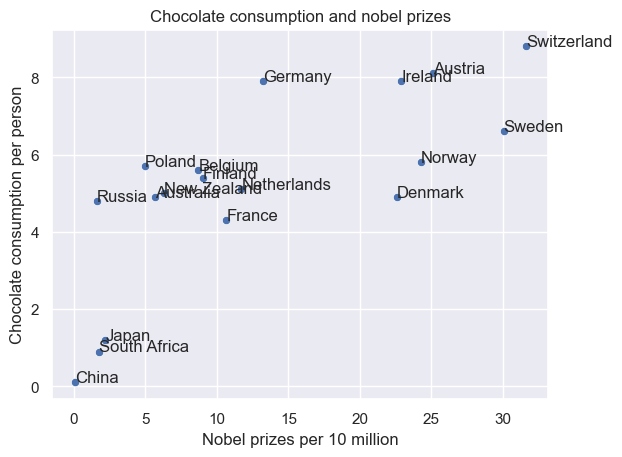

In [3]:
sns.scatterplot(data=choco, x="laureate", y="chocolate")
plt.title("Chocolate consumption and nobel prizes") #title
plt.xlabel("Nobel prizes per 10 million") 
plt.ylabel("Chocolate consumption per person")

for i, cn in enumerate (choco.country):
    plt.text(choco.laureate[i], choco.chocolate[i], cn)

plt.show()

## Unsupervised Learning
Find patterns (e.g., clusters) in the input data ($X$) without providing any expected output (unsupervised). The most popular unsupervised learning approch is clustering.

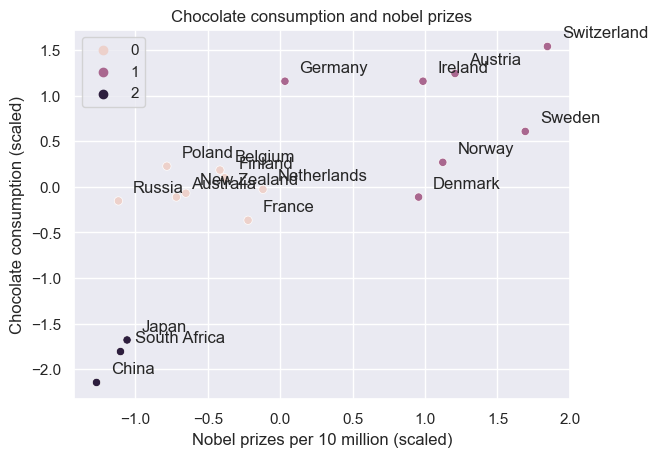

In [4]:
X = choco.iloc[:,1:3]
X_scale = StandardScaler().fit_transform(X)
km = KMeans(3)
cl_km = km.fit_predict(X_scale)
sns.scatterplot(x=X_scale[:,0], y=X_scale[:,1], hue=cl_km)
plt.title("Chocolate consumption and nobel prizes") #title
plt.xlabel("Nobel prizes per 10 million (scaled)") 
plt.ylabel("Chocolate consumption (scaled)")
for i, cn in enumerate (choco.country):
    plt.text(X_scale[i,0]+0.1, X_scale[i,1]+0.1, cn)

## Categorization
- Partitioning
- Hierarchical
- Density based
- Further approaches

## Supervised Learning
Find patterns in the input data ($X$) by providing the expected output (dependent variable $y$). 
<br>
Supervised learning approaches can be further divided into
 - Regression methods: The dependent variable is numeric, $y \in \mathbb{R}$
 - Classification methods: The dependent variable is categoric, $y \in \{c_1, c_2, \ldots, c_n\}$

From unsupervised to supervised
>  1) [Netzer, M., Hanser, F., Ledochowski, M., & Baumgarten, D. (2021, May). Unsupervised Learning for Hydrogen Breath Tests. In dHealth (pp. 54-61)](https://ebooks.iospress.nl/pdf/doi/10.3233/SHTI210089)
> 2) [Netzer, M., Hanser, F., Ledochowski, M., & Baumgarten, D. (2022). Supervised Machine Learning for Predicting Carbohydrate Malabsorptions Using Hydrogen Breath Tests. Current Directions in Biomedical Engineering, 8(2), 285-288.](https://www.degruyter.com/document/doi/10.1515/cdbme-2022-1073/pdf)

### Supervised Approaches
> (Witten, I. H., Frank, E., Hall, M. A., & Pal, C. J. (2016). Data Mining: Practical Machine Learning Tools and Techniques. In Data Mining: Practical Machine Learning Tools and Techniques)

- Lazy (e.g., K-Nearest Neighbors)
- Function based (e.g., Linear or Logistic Regression, SVM, Neural Networks)
- Bayes (e.g., Naive Bayes) 
- Rule based (z.B. PART)
- Decision trees (e.g., RPART)
- Meta (e.g., Random Forest, Stacking)

Which model?
> [Netzer, M., Baumgartner, C., & Baumgarten, D. (2022). Predicting prediction: A systematic workflow to analyze factors affecting the classification performance in genomic biomarker discovery. PLOS ONE, 17(11), e0276607.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0276607)


### Supervised Learning - Regression
Aim: Predict the number of nobel prizes per 10 million ($y$) based on the chocolote consumption ($X$).

R-squared 0.5477
p-value 0.0004


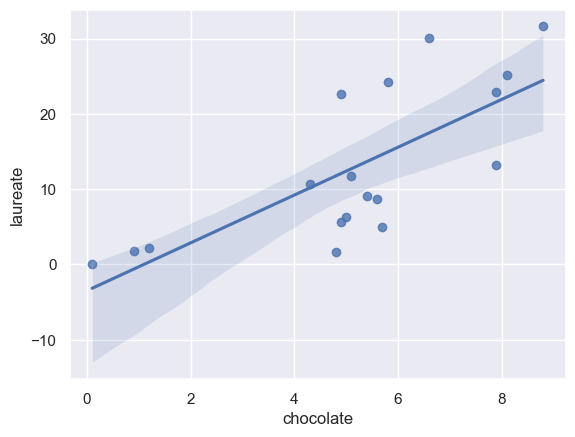

In [11]:
x = choco.loc[:,"chocolate"]
y = choco.loc[:,"laureate"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("R-squared", np.round(r_value**2,4))
print("p-value", np.round(p_value,4))
sns.regplot(x=x, y=y);


### Supervised Learning - Classification
The dependent variable $y$ is now categoric and is defined by
$$
y = \begin{cases}
    high & \text{if mount of laureate} > 15 \\
    small & \text{otherwise.}
\end{cases}
$$


We now predict the amount (high/low) of nobel prizes ($y$) based on the chocolate consumption ($x$).

In [6]:
yc = pd.cut(y, bins=[0,15,99], labels=["small","high"])
xr = x.values.reshape(-1, 1)
model = LogisticRegression()

model.fit(xr, yc)
y_pred = model.predict(xr)

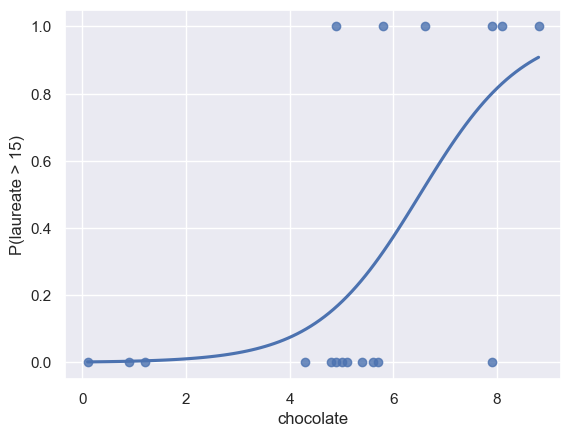

In [7]:
yc2 = yc.map({'high': 1, 'small': 0})
sns.regplot(x=x, y=yc2, logistic=True, ci=None);
plt.ylabel("P(laureate > 15)");

## Confusion matrix
Classification performance measures are mainly based on the confusion matrix that compares predicted and true labels.

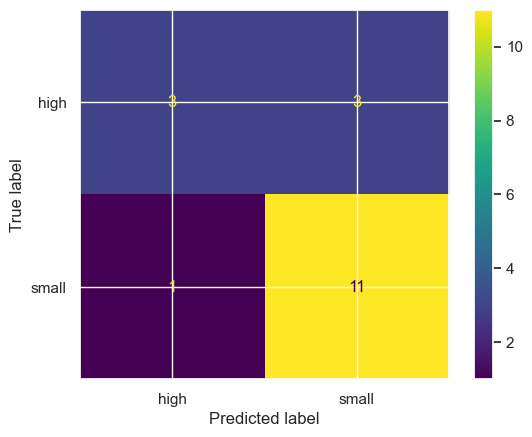

In [8]:
metrics.balanced_accuracy_score(yc,y_pred)
cm = metrics.confusion_matrix(yc, y_pred)
#sns.heatmap(cm, annot=True);

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

## Deep Learning
- Multi layer ANN + large-scale data sets = Deep Learning
- Can be unsupervised, supervised or semi-supervised 
- Feature extraction is part of the learning process


## Deep Learning cont. 
### Classical learning

<img src="images/classiclearning.png" alt="drawing" width="300"/>

### Deep learning
<img src="images/deeplearning.png" alt="drawing" width="300"/>
Images from dreamstudio.ai and Pixabay

## Reinforcement Learning
Idea: Learning based on rewarding/punishing wanted/unwanted output.
<br>
[Deep Reinforcement Learning With Python](https://towardsdatascience.com/reinforcement-learning-with-python-part-1-creating-the-environment-dad6e0237d2d)

In [9]:
IFrame(src="https://www.youtube.com/embed/SX08NT55YhA", width=560, height=315)

## Discriminative vs. Generative Models

- Discriminative models learn conditional probability distribution $P(y|x)$ 
<figure>
<img src="images/nemiman.jpeg" alt="drawing" width="150"/>
<figcaption>Is this a man or a women?</figcaption>
</figure>
- Generative models learn joint probability distribution $P(x,y)$
<figure>
<img src="images/nemiwoman.jpeg" alt="drawing" width="150"/>
<figcaption>Generate a women</figcaption>
</figure>

## Software ranking


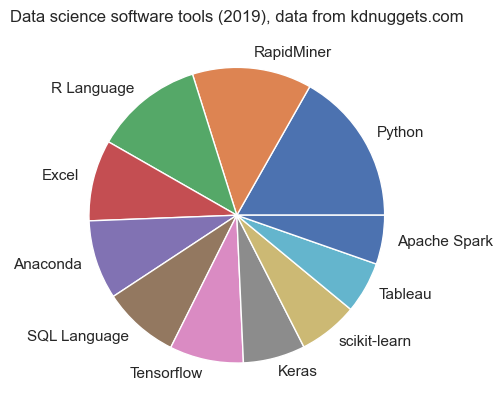

In [10]:
srat = pd.read_csv("data/kaggle.csv", sep=";")
plt.pie(srat["2019"], labels=srat["Software"]);
plt.title("Data science software tools (2019), data from kdnuggets.com");